# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-yMATKoY2e3Ltd85lyvT-Ht&si=8Ke2fNuWswEvFReG >}}

# 2. Imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# 3. Data 

`-` 전주시의 기온 불러오기 

In [172]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()

In [173]:
temp # 전주시의 기온, 100개

array([-4.1, -3.7, -3. , -1.3, -0.5, -0.3,  0.3,  0.4,  0.4,  0.7,  0.7,
        0.9,  0.9,  1. ,  1.2,  1.4,  1.4,  1.5,  1.5,  2. ,  2. ,  2. ,
        2.3,  2.5,  2.5,  2.5,  2.6,  2.6,  2.9,  3.2,  3.5,  3.5,  3.6,
        3.7,  3.8,  4.2,  4.4,  4.5,  4.5,  4.6,  4.9,  4.9,  4.9,  5. ,
        5. ,  5.1,  5.6,  5.9,  5.9,  6. ,  6. ,  6.1,  6.1,  6.3,  6.3,
        6.4,  6.4,  6.5,  6.7,  6.8,  6.8,  7. ,  7. ,  7.1,  7.2,  7.4,
        7.7,  8. ,  8.1,  8.1,  8.3,  8.4,  8.4,  8.4,  8.5,  8.8,  8.9,
        9.1,  9.2,  9.3,  9.4,  9.4,  9.5,  9.6,  9.6,  9.7,  9.8,  9.9,
       10.2, 10.3, 10.6, 10.6, 10.8, 11.2, 12.1, 12.4, 13.4, 14.7, 15. ,
       15.2])

`-` 아래와 같은 모형을 가정하자. 

$$\textup{초코 아이스크림 판매량} = 20 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

$$\textup{바닐라 아이스크림 판매량} = 40 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

> 의미: (1) 온도가 1 올라가면 판매량이 2.5정도 오른다. (2) 동일 온도라면, 바닐라아이스크림은 초코아이스크림보다 20만큼 잘팔린다. 

In [174]:
np.random.seed(43052)
choco = 20 + temp * 2.5 + np.random.randn(100)*3
vanilla = 40 + temp * 2.5 + np.random.randn(100)*3

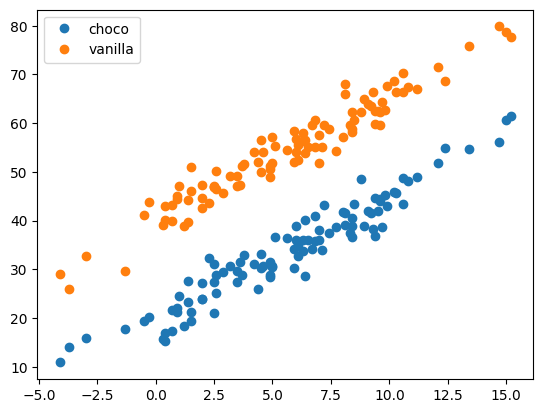

In [175]:
plt.plot(temp,choco,'o',label='choco')
plt.plot(temp,vanilla,'o',label='vanilla')
plt.legend()

`-` 주어진 자료: 우리는 아래를 관측했다고 생각하자. 

In [176]:
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df = pd.concat([df1,df2])
df

,temp,sales,type
0,-4.1,10.900261,choco
1,-3.7,14.002524,choco
2,-3.0,15.928335,choco
3,-1.3,17.673681,choco
4,-0.5,19.463362,choco
...,...,...,...
95,12.4,68.708075,vanilla
96,13.4,75.800464,vanilla
97,14.7,79.846568,vanilla
98,15.0,78.713140,vanilla


# 5. 분석

## A. 데이터 

In [177]:
X = df[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

In [178]:
X = X.assign(type = [type == 'choco' for type in X.type])

## B. Predictor 생성 

In [179]:
predictr = sklearn.linear_model.LinearRegression() 
predictr 

LinearRegression()

## C. 학습 (fit, learn)

In [180]:
predictr.fit(X,y)

LinearRegression()

## D. 예측 (predict)

In [181]:
yhat = predictr.predict(X)

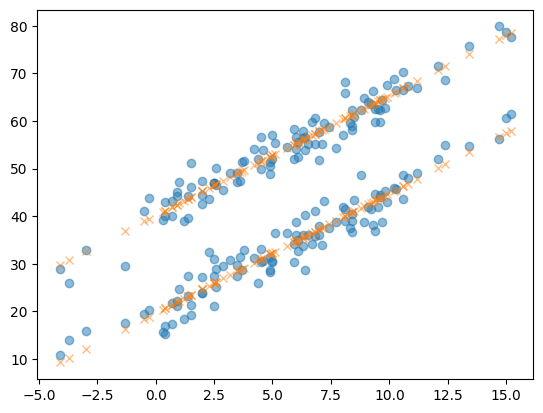

In [182]:
plt.plot(df.temp,df.sales,'o',alpha=0.5)
plt.plot(df.temp,yhat, 'x',alpha=0.5)

`-` 어떻게 맞춘거지? 

$$\textup{아이스크림 판매량} = 40 + \textup{아이스크림종류} \times (-20) + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [183]:
predictr.coef_, predictr.intercept_

(array([[  2.52239574, -20.54021854]]), array([40.16877158]))

`-` 온도가 -2이고, type이 초코라면? 예측값은? 

In [184]:
Xnew = pd.DataFrame({'temp':[-2.0],'type':[1]})
Xnew

,temp,type
0,-2.0,1


In [185]:
predictr.predict(Xnew)

array([[14.58376156]])

`-` 온도가 -2이고, type이 바닐라라면? 예측값은? 

In [186]:
Xnew = pd.DataFrame({'temp':[-2.0],'type':[0]})
Xnew

,temp,type
0,-2.0,0


In [187]:
predictr.predict(Xnew)

array([[35.1239801]])

# 6. 데이터를 전처리하는 다른 방법 

`-` 데이터

In [188]:
X = df[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

`-` 원-핫 인코딩 

In [189]:
X = pd.get_dummies(X)
X

,temp,type_choco,type_vanilla
0,-4.1,True,False
1,-3.7,True,False
2,-3.0,True,False
3,-1.3,True,False
4,-0.5,True,False
...,...,...,...
95,12.4,False,True
96,13.4,False,True
97,14.7,False,True
98,15.0,False,True


`-` 이후의 과정은 동일 

In [190]:
predictr = sklearn.linear_model.LinearRegression() 
predictr.fit(X,y)
yhat2 = predictr.predict(X)

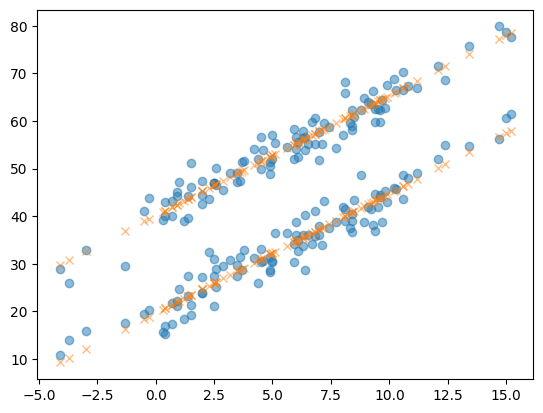

In [191]:
plt.plot(df.temp,df.sales,'o',alpha=0.5)
plt.plot(df.temp,yhat2, 'x',alpha=0.5)

`-` 모형을 어떻게 바라본걸까? 

In [192]:
predictr.coef_

array([[  2.52239574, -10.27010927,  10.27010927]])

In [193]:
predictr.intercept_

array([29.89866231])

$$\textup{아이스크림 판매량} = 30 + \textup{초코} \times (-10) + \textup{바닐라} \times 10 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

# 7. 모형을 평가하는 방법 

In [194]:
predictr.score(X,y)

0.9628857449454437